<a href="https://colab.research.google.com/github/Chaithra8104/google_stock_prediction/blob/main/STOCK_PREDICTIONSgoogle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicting Stocks Prices using Regression Analysis

In [ ]:
#standard data imports
import pandas as pd
import numpy as np

#visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#scikit-;earn metrics,functions and models
from sklearn import metrics

Loading the csv file and reading the  dataset

In [ ]:
#loading the csv file frm the file location dataset
df = pd.read_csv("GOOG.csv")


In [ ]:
#printing the over view of the raw data set
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,0.0,1.0


In [ ]:
# Identififying the shape of the data
df.shape

(1258, 14)

DATA PREPARATION

In [ ]:
#Dropping the variables we do not need.
df = df.drop(columns=["symbol","adjClose","adjHigh","adjLow","adjOpen","adjVolume","divCash","splitFactor"],axis = 1)



In [ ]:
#printing the dataset to review the remaining variables
df.head()

,date,close,high,low,open,volume
0,2016-06-14 00:00:00+00:00,718.27,722.47,713.1200,716.48,1306065
1,2016-06-15 00:00:00+00:00,718.92,722.98,717.3100,719.00,1214517
2,2016-06-16 00:00:00+00:00,710.36,716.65,703.2600,714.91,1982471
3,2016-06-17 00:00:00+00:00,691.72,708.82,688.4515,708.65,3402357
4,2016-06-20 00:00:00+00:00,693.71,702.48,693.4100,698.77,2082538


for the data preparation process, the following six variables will be kept:'date','close','high',;loe','open','volume'

Checking duplicates

In [ ]:
#clean the data
df.duplicated().sum().any()

np.False_

Checking for any null values

In [ ]:
# Checking for true or false for any nulls in dataset
df.isnull().values.any()

np.False_

checking and reviewing dataframe information


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1258 non-null   object 
 1   close   1258 non-null   float64
 2   high    1258 non-null   float64
 3   low     1258 non-null   float64
 4   open    1258 non-null   float64
 5   volume  1258 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 59.1+ KB


Overview Descriptive Statictic for the data

In [ ]:
df.describe()

,close,high,low,open,volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06


Checking the general correlation between all columns and their relationships

Visulization correlation

Visulation overview of relationships in the dataset

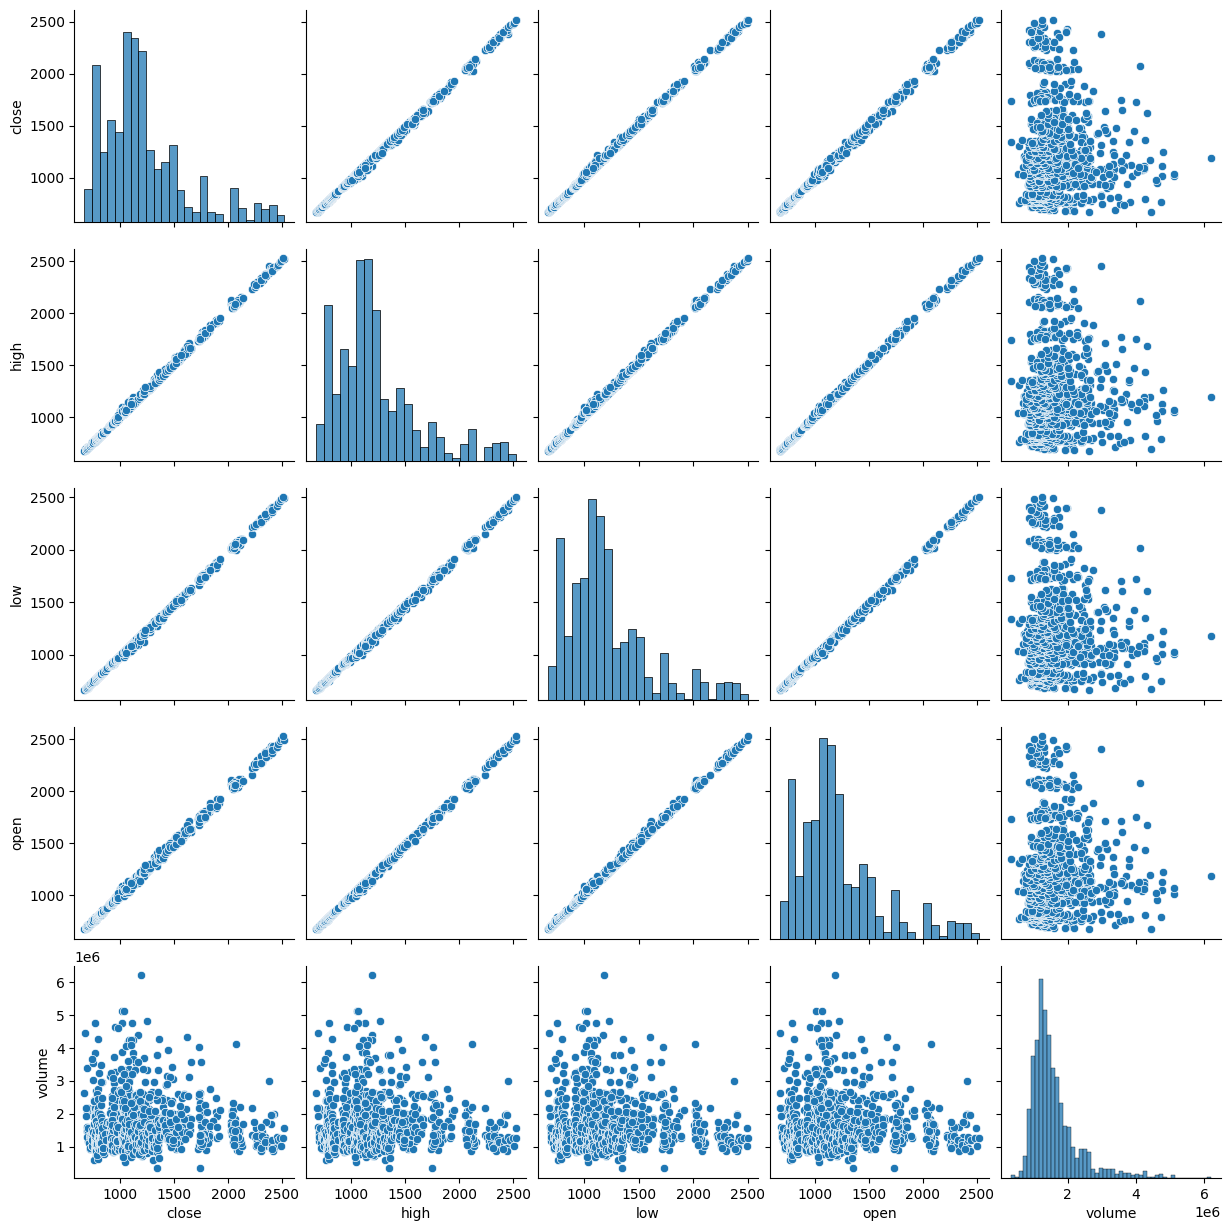

In [ ]:
#showing visualization on all variables in the data
sns.pairplot(df)

hist() = Histogram plot

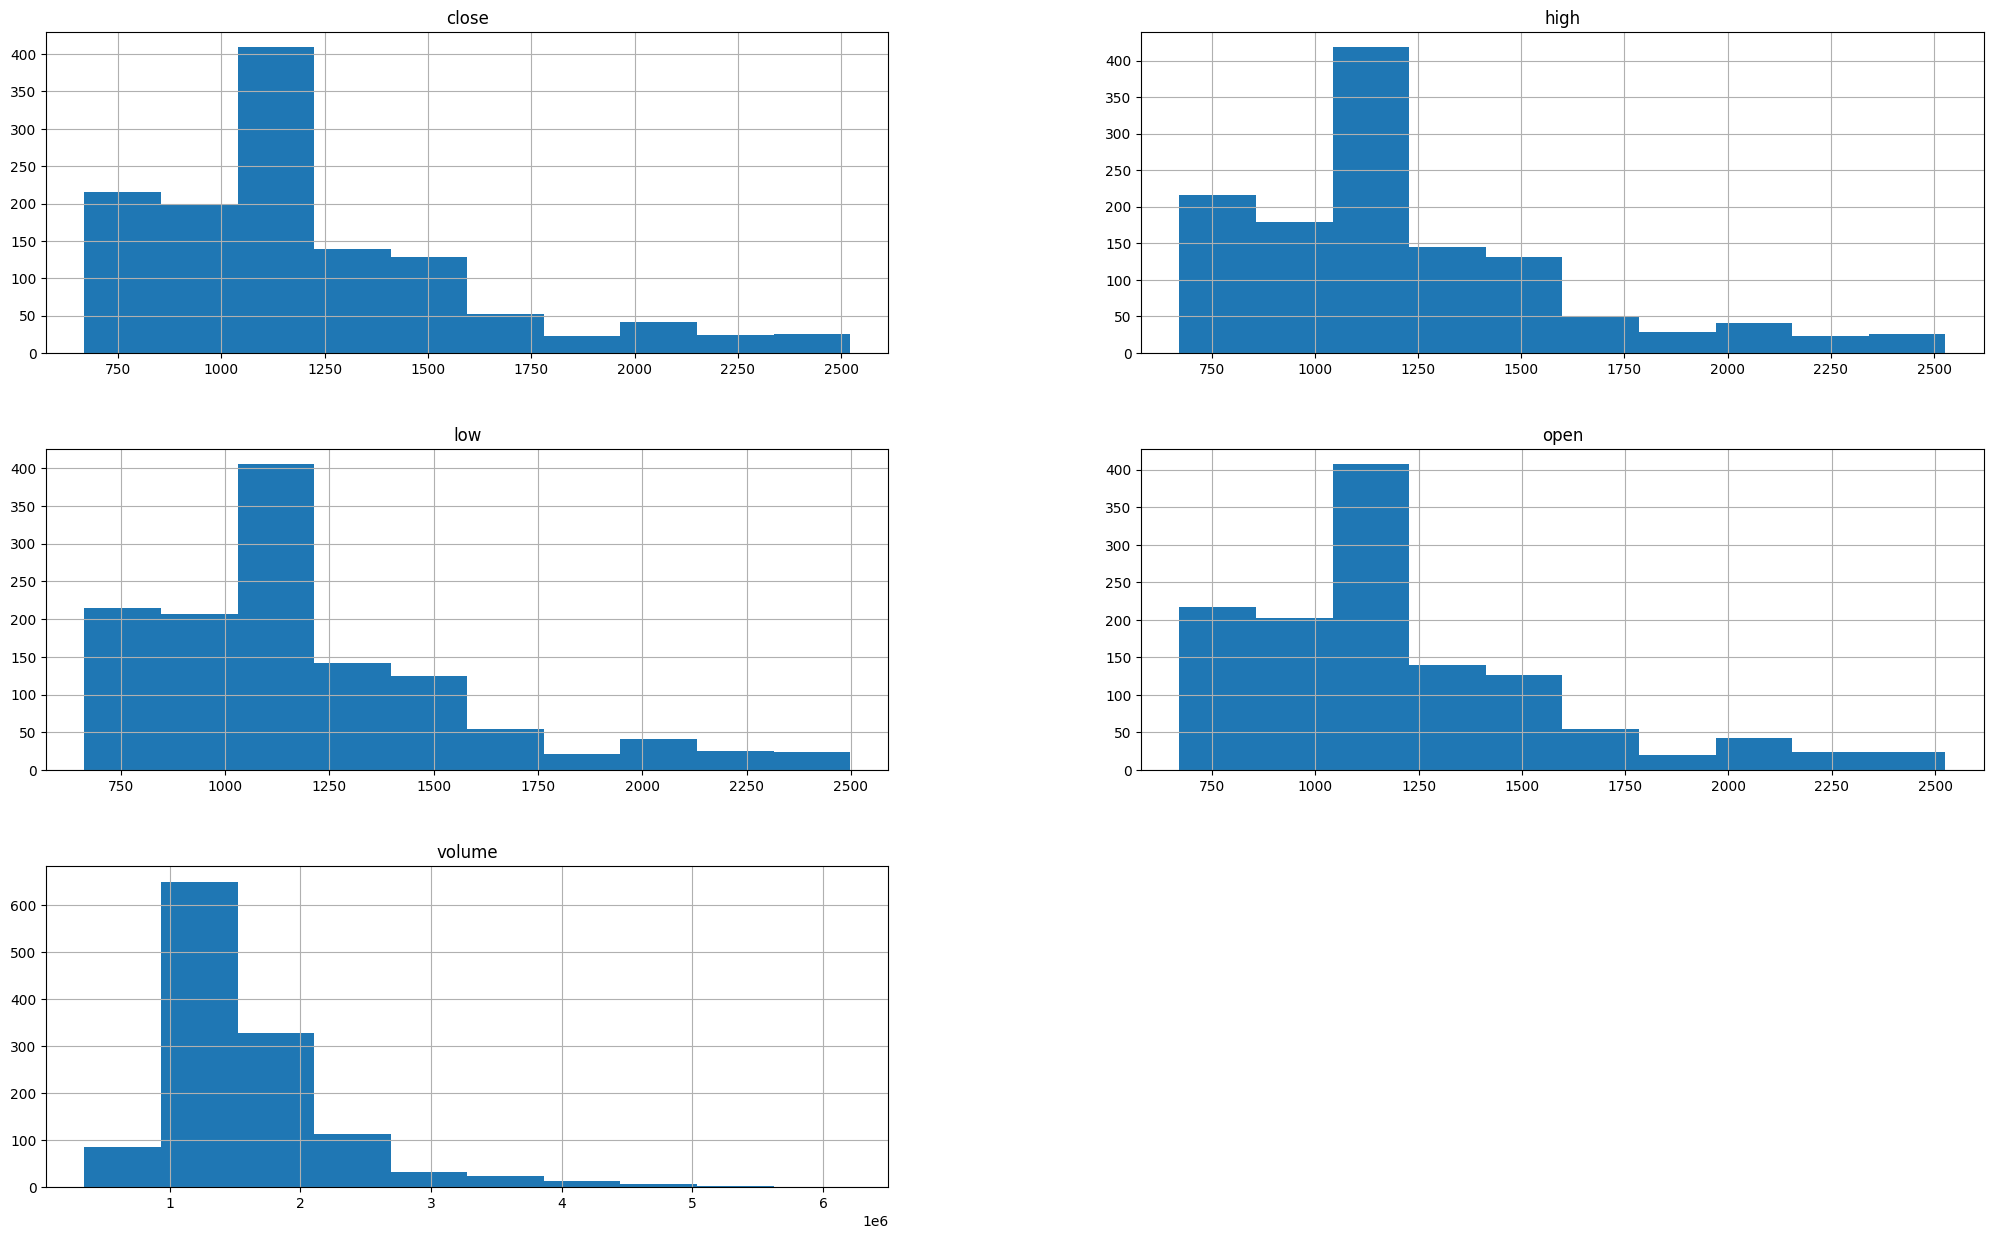

In [ ]:
df.hist(figsize=(25,15))
plt.show()

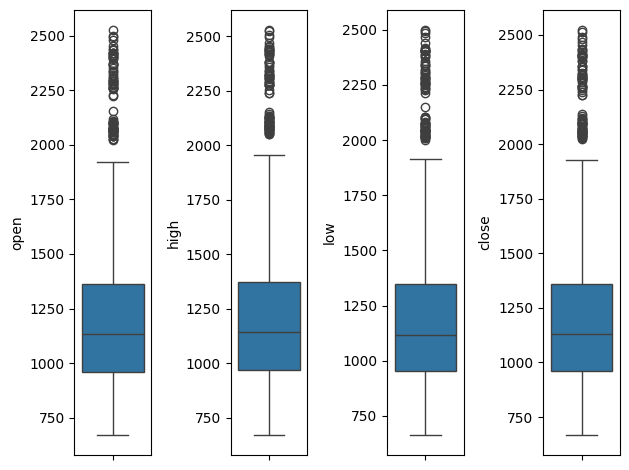

In [ ]:
# Review box plot
f, axes = plt.subplots(1,4)
sns.boxplot(y="open", data=df, ax=axes[0])
sns.boxplot(y="high", data=df, ax=axes[1])
sns.boxplot(y="low", data=df, ax=axes[2])
sns.boxplot(y="close", data=df, ax=axes[3])
plt.tight_layout()

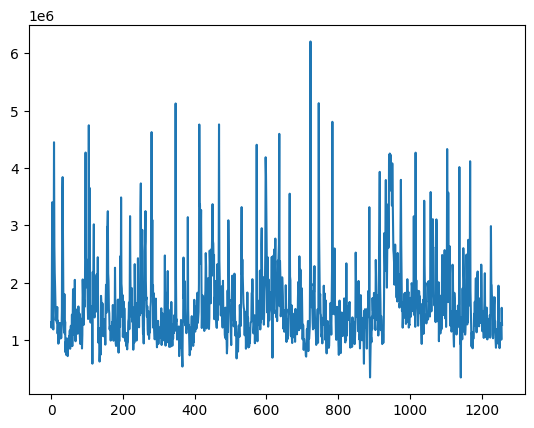

In [ ]:
plt.plot(df["volume"])



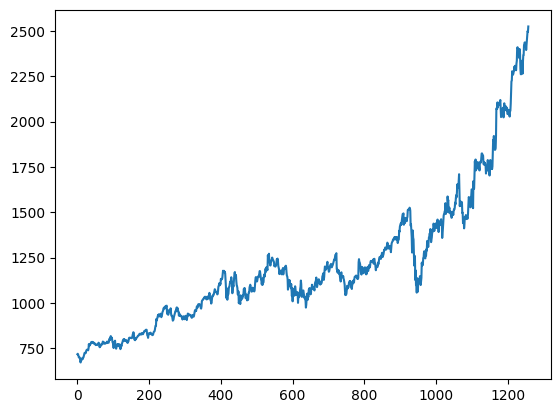

In [ ]:
plt.plot(df["open"])


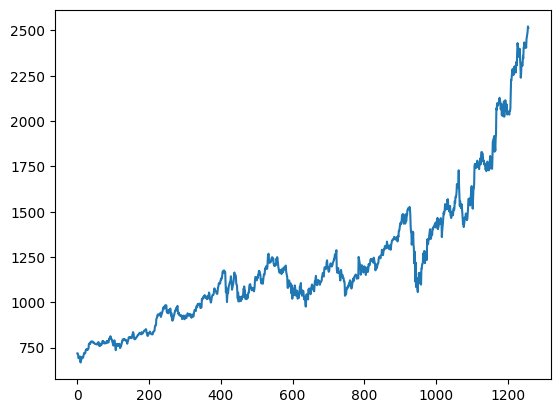

In [ ]:
plt.plot(df["close"])

In [ ]:
import plotly.graph_objects as go

figure = go.Figure(data=[go.Candlestick(x=df["date"], open=df["open"], high=df["high"], low=df["low"], close=df["close"])])
figure.update_layout(title = "Google Stock Price Analysis", xaxis_rangeslider_visible=False)
figure.show()

SPLIT THE DATA

In [ ]:
# Splitting the dataset

X = df[["open", "high", "low", "volume"]].values # independent varibles
y = df["close"].values  # dependent variables

Split the data 70% train and 30% testing

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
#Checking  the shape for train and test data

print("Train:", X_train.shape)
print("Test:", X_test.shape)


Train: (880, 4)
Test: (378, 4)


Training the model linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import statsmodels.api as sm

# Creating Regression Model
regressor = LinearRegression()

#fit Linear regression  model
model = regressor.fit(X_train, y_train)

#use model to make to amke prediction
y_pred = regressor.predict(X_test)

Prediction

In [ ]:
predicted = regressor.predict(X_test)

In [ ]:
# X_test shape
predicted.shape

(378,)

Validating the fit

In [ ]:
# Printout relevant metrics
print("Model Coefficients:", regressor.coef_)

#  Looking at the intercept
print("Model intercept:", regressor.intercept_)

Model Coefficients: [-5.60893963e-01  7.84253230e-01  7.75535009e-01 -7.67783462e-08]
Model intercept: 1.7106098572228348


Prediction Table of Actual Prices and Predicted values

In [ ]:
dframe = pd.DataFrame(y_test,predicted)
dfr = pd.DataFrame({"Actual_Price":y_test,"Predicted_Price":predicted})
print(dfr)

     Actual_Price  Predicted_Price
0          801.49       804.029064
1         1389.11      1363.203687
2          768.24       775.863615
3          768.79       773.244624
4         1095.57      1101.117726
..            ...              ...
373       1077.15      1071.845764
374       1189.53      1185.464440
375        789.27       790.060303
376        830.76       832.962753
377       1168.08      1172.058615

[378 rows x 2 columns]


Stats on Actual Price and Predicted price

In [ ]:
dfr.describe()

,Actual_Price,Predicted_Price
count,378.000000,378.000000
mean,1185.680899,1186.132829
std,371.595290,371.355944
min,692.100000,690.260660
25%,931.600000,933.272663
50%,1115.280000,1115.699142
75%,1320.285000,1323.161276
max,2482.850000,2481.175740


<ipython-input-60-5da37c02674c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: ylabel='Density'>

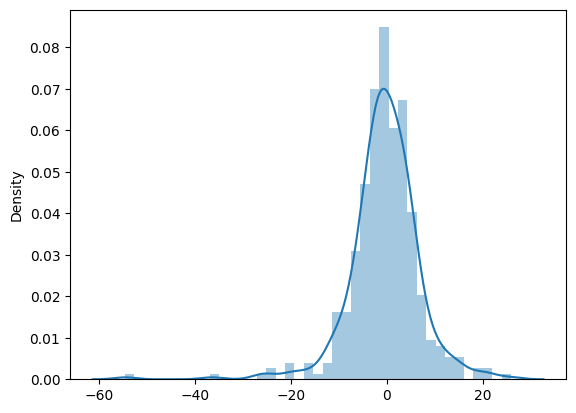

In [ ]:
#This is the differnce of y_test values subtracting the prediction values

residual = y_test - predicted
sns.distplot(residual)

In [ ]:
results3 = sm.OLS(y_test,X_test).fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.706e+06
Date:                Mon, 09 Jun 2025   Prob (F-statistic):                        0.00
Time:                        09:18:21   Log-Likelihood:                         -1287.9
No. Observations:                 378   AIC:                                      2584.
Df Residuals:                     374   BIC:                                      2600.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.5496      0.043    -12.868      0.000      -0.634      -0.466
x2             0.6921      0.036     19.031      0.000       0.621       0.764
x3             0.8591      0.040     21.747      0.000       0.781       0.937
x4         -1.067e-07   4.81e-07     -0.222      0.825   -1.05e-06     8.4e-07
==============================================================================
Omnibus:                       94.528   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.460
Skew:                          -0.736   Prob(JB):                    2.68e-199
Kurtosis:                      10.476   Cond. No.                     2.45e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.45e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Checking the regression values

from sklearn.metrics import confusion_matrix, accuracy_score
regression_confidence = regressor.score(X_test,y_test)
print("Linear regression confindence: ", regression_confidence)

Linear regression confindence:  0.9996015457599974


Model Accuracy

In [ ]:
x2 = abs(predicted - y_test)
y2 =100 * (x2 / y_test)
accuracy = 100 - np.mean(y2)
print("Accuracy:", round(accuracy, 2), "%.")

Accuracy: 99.6 %.


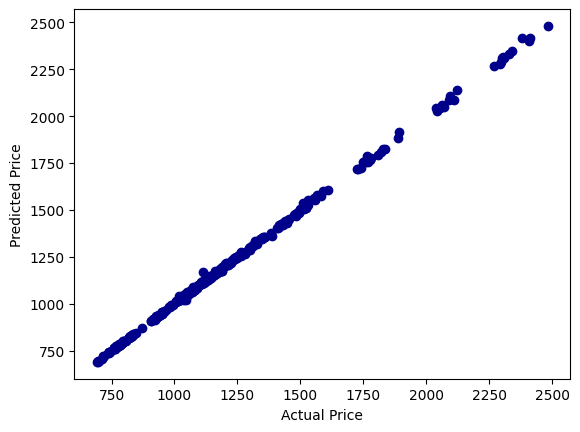

In [ ]:
plt.scatter(dfr.Actual_Price, dfr.Predicted_Price, color="Darkblue")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

Graphing the first 20 values

<Axes: >

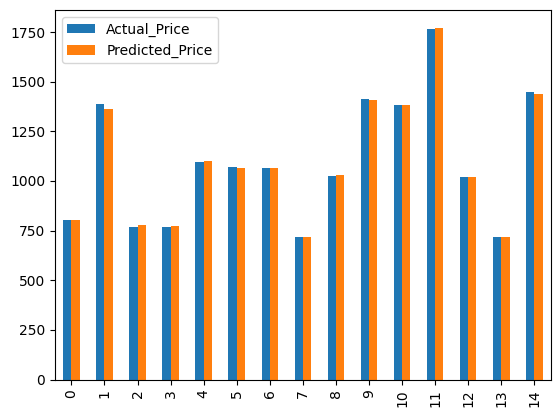

In [ ]:
#graph for first 20 values

graph = dfr.head(15)
graph.plot(kind="bar")

In [ ]:
from sklearn import metrics